## Introduction
Bike-sharing systems are a growing trend in urban transportation, offering a convenient and eco-friendly alternative to traditional modes of travel. However, accurately predicting demand for these shared bikes is crucial for optimizing resource allocation and maximizing profits. 

This project aims to develop a multiple linear regression model to predict the demand for shared bikes in the US market. The model will utilize data from a US bike-sharing provider, BoomBikes, to identify key factors influencing rental volume and assess their impact. 

By analyzing factors like weather conditions, seasonality, and year, we hope to gain valuable insights into user behavior and support BoomBikes in developing a data-driven strategy to meet customer needs and enhance their business operations.

## Goals and Expected Outcomes
The primary goal of this project is to construct a robust multiple linear regression model capable of predicting the demand for shared bikes offered by BoomBikes across the American market. This model will be built upon historical data provided by BoomBikes, encompassing various factors believed to influence rental volume.

By analyzing these factors, we aim to achieve the following outcomes:

**Identify Significant Factors**: The model will reveal which variables among the provided data set hold the most significant influence on the demand for shared bikes. This will provide BoomBikes with a clear understanding of the key drivers impacting their business.

**Predict Demand Levels**: The trained model will be able to predict the expected number of bike rentals based on the input features. This information will be instrumental in optimizing resource allocation, ensuring sufficient bikes are available at high-demand locations and times.

**Inform Business Strategy**: The insights gained from the model's performance and the identified significant factors will inform BoomBikes' business strategy. This can lead to targeted marketing campaigns, strategic pricing adjustments, and improved operational efficiency.

Ultimately, this project aspires to equip BoomBikes with a valuable tool for understanding and predicting bike-sharing demand. This knowledge will empower them to make informed decisions, enhance customer satisfaction, and solidify their position within the growing bike-sharing market.

## Steps Involved in Building a Bike Sharing Demand Prediction Model:
1. **Data Acquisition**: Obtain the bike-sharing data provided by BoomBikes. This data will likely include information on factors like daily rental counts, weather conditions, seasonality, and potentially other relevant features.

2. **Data Preprocessing**: Clean and prepare the data for analysis. This may involve handling missing values, converting categorical variables with ordinal encoding to strings for proper interpretation by the model, and checking for outliers.

3. **Exploratory Data Analysis (EDA)**: Gain an initial understanding of the data by performing visualizations and calculating summary statistics. This step helps identify relationships between features and the target variable (bike rental count).

4. **Feature Engineering**: Based on the findings from EDA, consider creating new features, transformations or dummy variables that might improve model performance. This could involve interaction terms between existing features or deriving new features based on domain knowledge.

5. **Train-Test Split**: Divide the data into two sets: a training set used to build the model and a testing set used to evaluate its performance on unseen data.

6. **Model Building**: Choose and implement a multiple linear regression model. Train the model on the training data, allowing it to learn the relationships between features and the target variable.

7. **Model Evaluation**: Evaluate the model's performance on the testing set. This typically involves calculating metrics like R-squared score, which indicates how well the model explains the variance in the target variable. Additionally, perform residual analysis to check for model assumptions and identify potential issues.

8. **Interpretation**: Analyze the model coefficients to understand the impact of each feature on the predicted bike rental count. Additionally, consider feature importances (if applicable) to identify the most influential factors.

## 1. Data Acquisition

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import basic libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data into dataframe
df = pd.read_csv("day.csv")

In [4]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## 2. Data Preprocessing

### Data Dictionary
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [5]:
# Look for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Assessment**: No missing values apparent, more checks below

In [6]:
# Assess the numerical data using describe, catch any outliers
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

**Assessment**: No outliers apparent

In [7]:
# Check Dataframe Shape to have expected rows and columns
df.shape

(730, 16)

In [8]:
# Check if any columns have null values
round(100*(df.isnull().sum()/len(df)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

**Assessment**: No missing/nulls values found

In [9]:
# Transform date field to standard format and add days since column
df.dteday = pd.to_datetime(df.dteday, format='%d-%m-%Y')
df.days = (df.dteday - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

#### Categorical Variables
Check value counts of each categorical variables to give an idea of their spread

In [10]:
for col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    print(df[col].value_counts(ascending=False), '\n')

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 

yr
0    365
1    365
Name: count, dtype: int64 

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 

holiday
0    709
1     21
Name: count, dtype: int64 

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 

workingday
1    499
0    231
Name: count, dtype: int64 

weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



#### Plot trend of rentals by date
This should give an idea of how the rentals have been trending since the start of the company.
**Initial Assessment**: Following trends are observed
1. Rentals have picked up from 2018 to 2019
2. There is strong seasonality in the weekly rentals - perhaps weekends and holidays have rental spikes than weekdays
3. There is seasonality in seasons - perhaps rentals are higher in Spring, Summer and Fall, than in Winters
4. There is a sharp decline in late 2019 and early 2020 - perhaps with onset of Covid

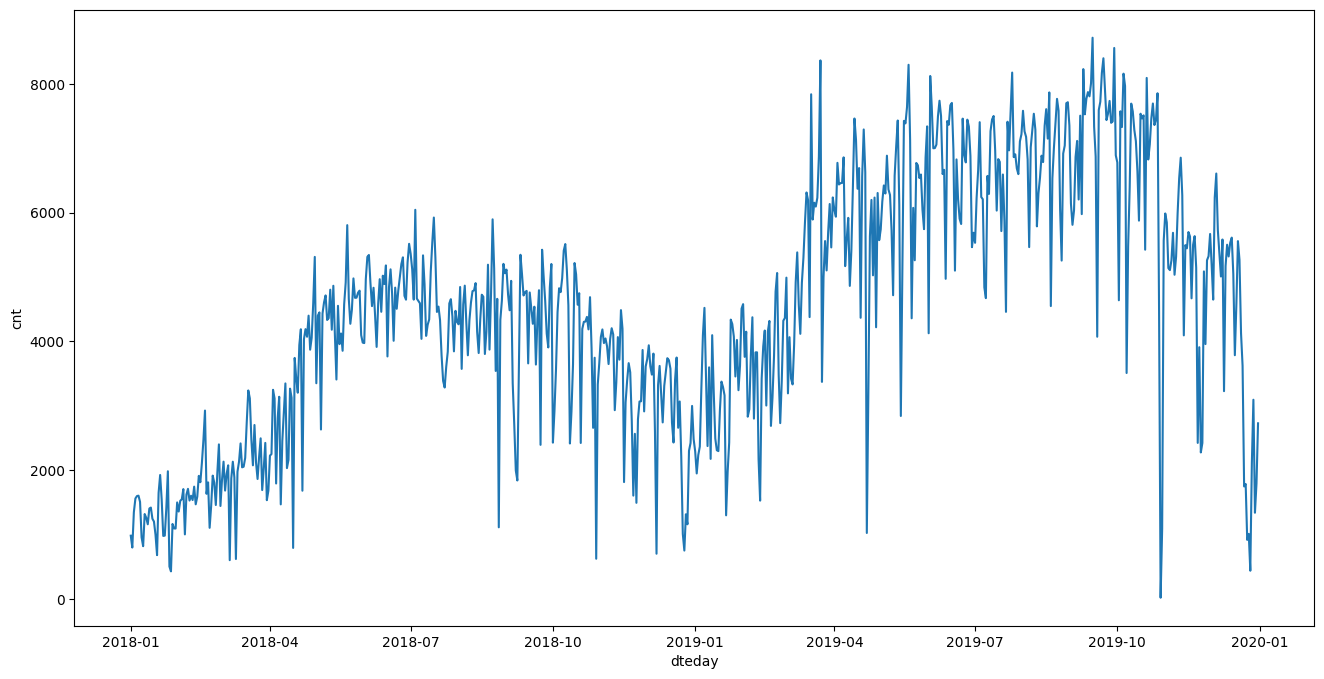

In [11]:
plt.figure(figsize = (16, 8))
sns.lineplot (data=df, x='dteday', y='cnt')
plt.show()

** Drop Columns **
Dropping following columns at they appear to have limited impact
1. `instant` is a row instance identifier.
2.  `dteday` a  some of date features like `mnth` and `year` and `weekday`are presents anddaily analysis is not in scope.3. - `casual` and `registered` variablethemselves dont seem to have an influencerand they are rolled up to `cnt`se target variabe.

In [12]:
df.drop(['dteday', 'instant', 'casual', 'registered'], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
# Check correlation among the independent variables
df.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   

                 cnt  
season      0.404584  
yr          0.569728  
mnth        0.278191  
holiday    -0.068764  
weekday     0.067534  
workingday  0.062542  
weathersit -0.295929  
temp        0.627044  
atemp       0.630685  
hum        -0.098543  
windspeed  -0.235132  
cnt         1.000000

Transform categorical data into their numeric values and retain order

In [15]:
df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace = True)
df.weathersit.replace({1:'good', 2:'moderate', 3:'bad', 4:'severe'}, inplace = True)
df.mnth.replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'}, inplace = True)
df.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace = True)
df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

## 3. Exploratory Data Analysis
Plot the **Categorical Variables** against the target variable to check for any patterns

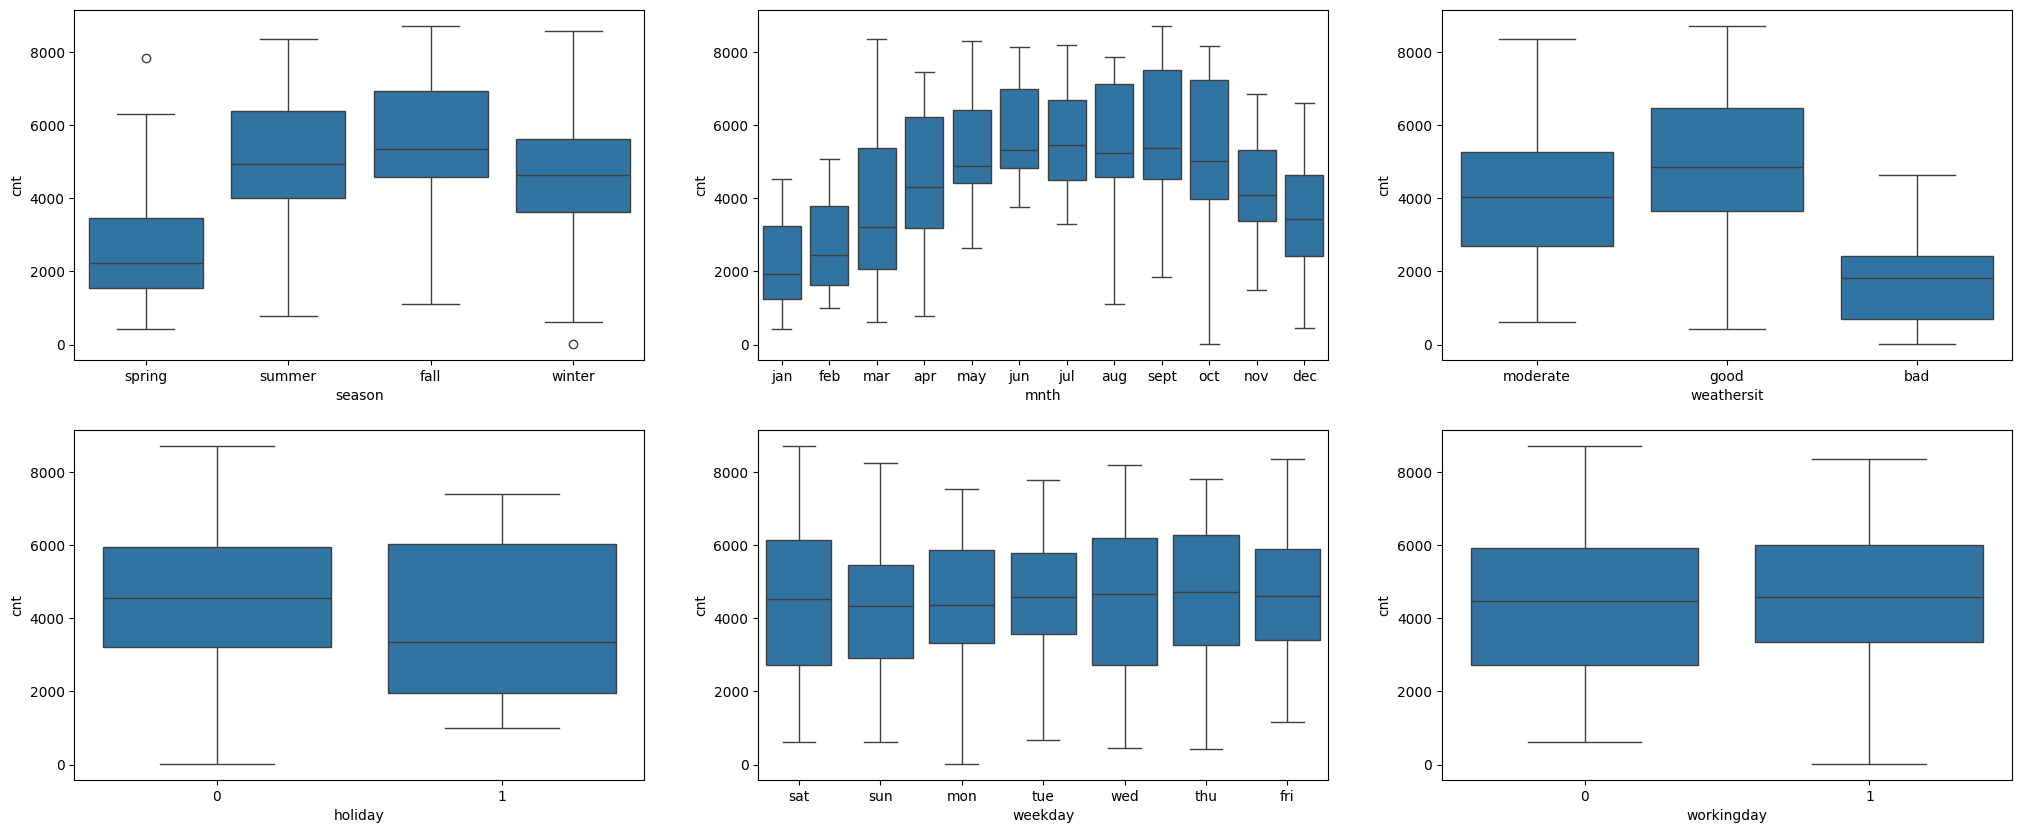

In [16]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

**Assessment**
`Season`, `Mnth` and `Weathersit` appear to have clear influence on Rentals

Plot the **Numeric Variables** against the target variable to check for any patterns

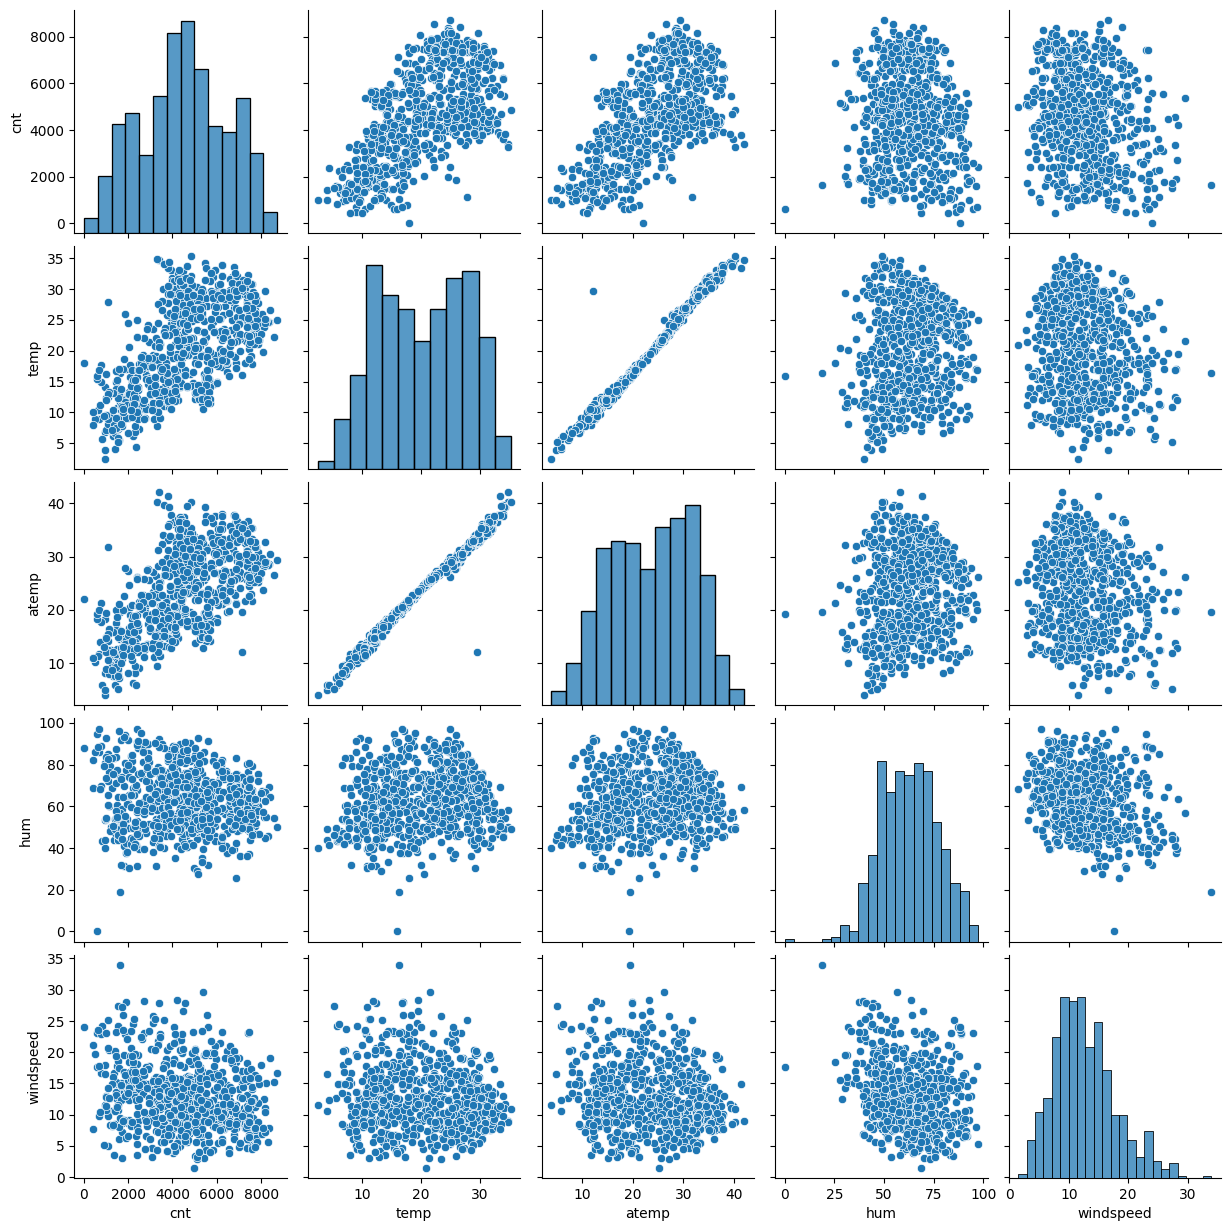

In [17]:
sns.pairplot(df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

**Assessment**
- `Temp` and `atemp` appear to have clear positive correlation on Rentals
- `Hum` and `windspeed` may have negative coorelation on Rentals
- `Temp` and `atemp` have high correlation hence `Temp` can be dropped as `atemp` (feeling temparature) matters for rentals

In [18]:
df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']]

cnt       temp     atemp      hum  windspeed
0     985  14.110847  18.18125  80.5833  10.749882
1     801  14.902598  17.68695  69.6087  16.652113
2    1349   8.050924   9.47025  43.7273  16.636703
3    1562   8.200000  10.60610  59.0435  10.739832
4    1600   9.305237  11.46350  43.6957  12.522300
..    ...        ...       ...      ...        ...
725  2114  10.420847  11.33210  65.2917  23.458911
726  3095  10.386653  12.75230  59.0000  10.416557
727  1341  10.386653  12.12000  75.2917   8.333661
728  1796  10.489153  11.58500  48.3333  23.500518
729  2729   8.849153  11.17435  57.7500  10.374682

[730 rows x 5 columns]

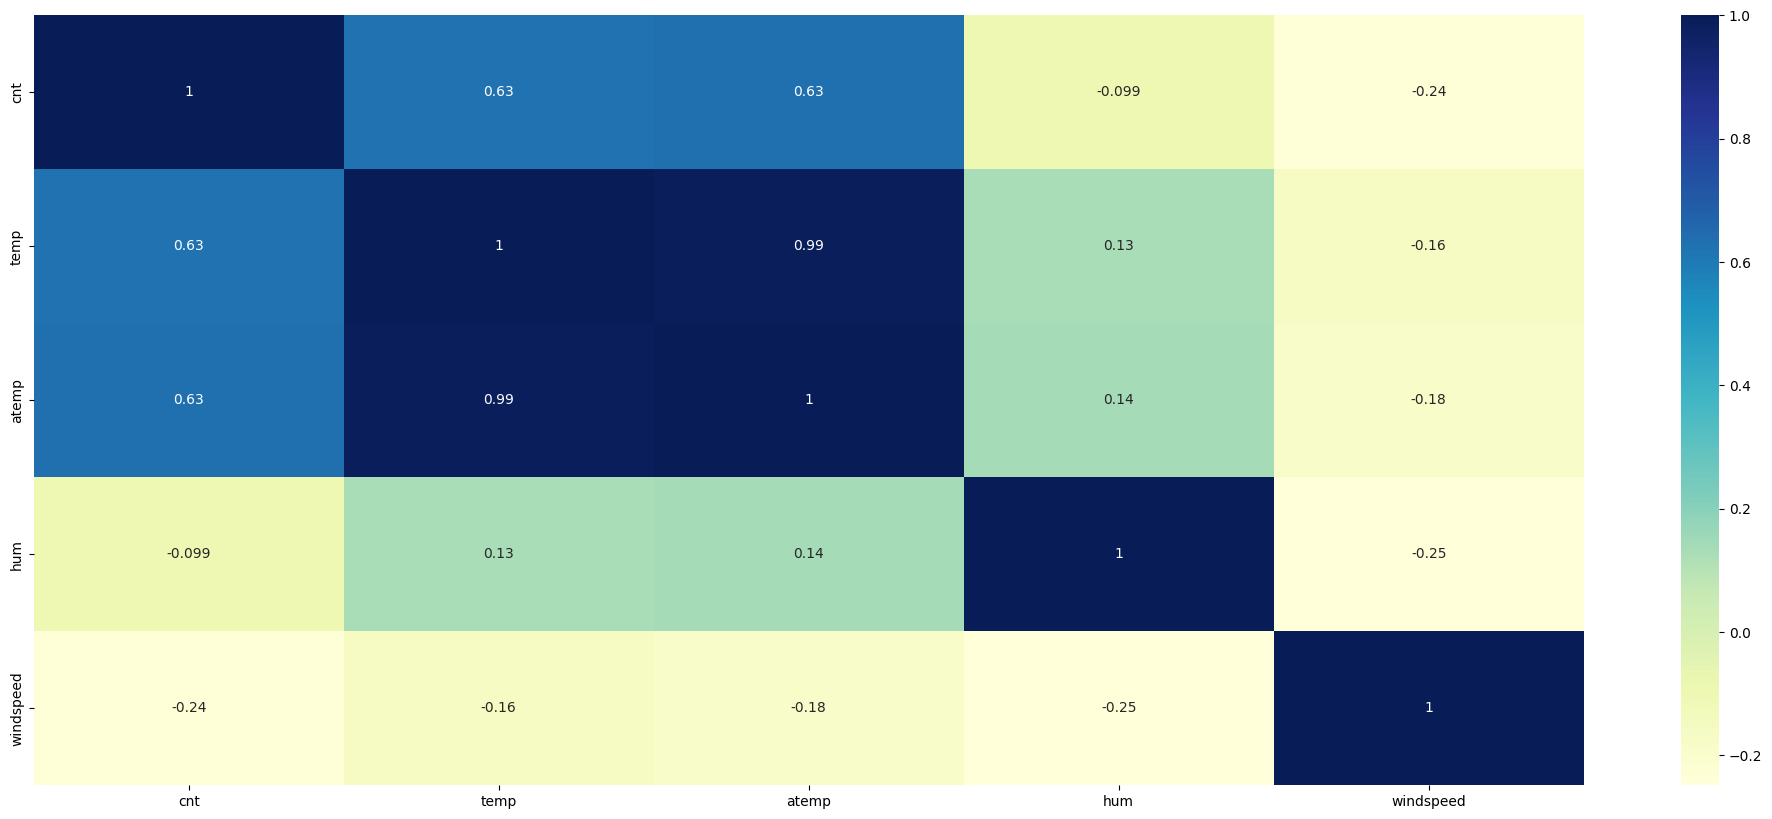

In [19]:
#Plot Correlation among Numeric Variables
plt.figure(figsize=(25,10))
sns.heatmap(df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr(),annot=True, cmap='YlGnBu' )
plt.show()

In [20]:
# Temp and atemp have high correlation hence temp is being dropped
df.drop(['temp'], axis = 1, inplace = True)

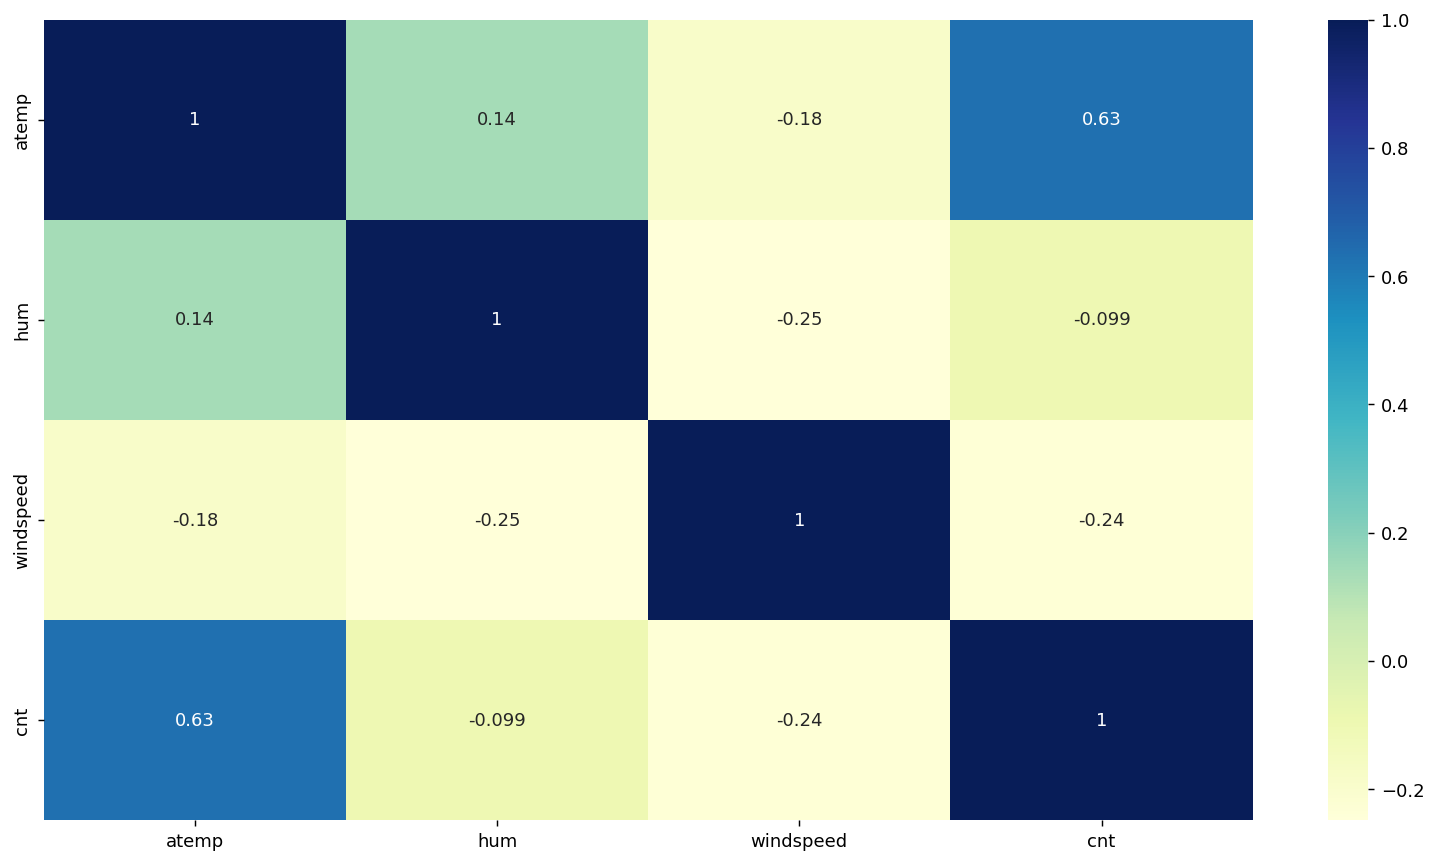

In [21]:
plt.figure(figsize=(15,8), dpi=130)
sns.heatmap(df[['atemp','hum','windspeed','cnt']].corr(), cmap='YlGnBu', annot = True)
plt.show()

**Assessment**: Good correlation between `atemp` and `cnt`

## 4. Feature Engineering
### Dummy Variables
Create Dummy Variables for Categorical Variables 
Use Drop_First=true for `Weekday`, `Season` and `Mnth` 

In [22]:
df = pd.get_dummies(data=df, columns=['weekday', 'season', 'mnth'], drop_first=True, dtype=int)
df = pd.get_dummies(data=df, columns=['weathersit'], dtype=int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   atemp                730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   weekday_mon          730 non-null    int32  
 8   weekday_sat          730 non-null    int32  
 9   weekday_sun          730 non-null    int32  
 10  weekday_thu          730 non-null    int32  
 11  weekday_tue          730 non-null    int32  
 12  weekday_wed          730 non-null    int32  
 13  season_spring        730 non-null    int32  
 14  season_summer        730 non-null    int32  
 15  season_winter        730 non-null    int

In [23]:
df.shape

(730, 30)

Plot Temperature, Humidity and Windspeed in a RegPlot
**Assessment**: 
- Temperature has positive correlation
- Humidity and Windspeed have negative correlation

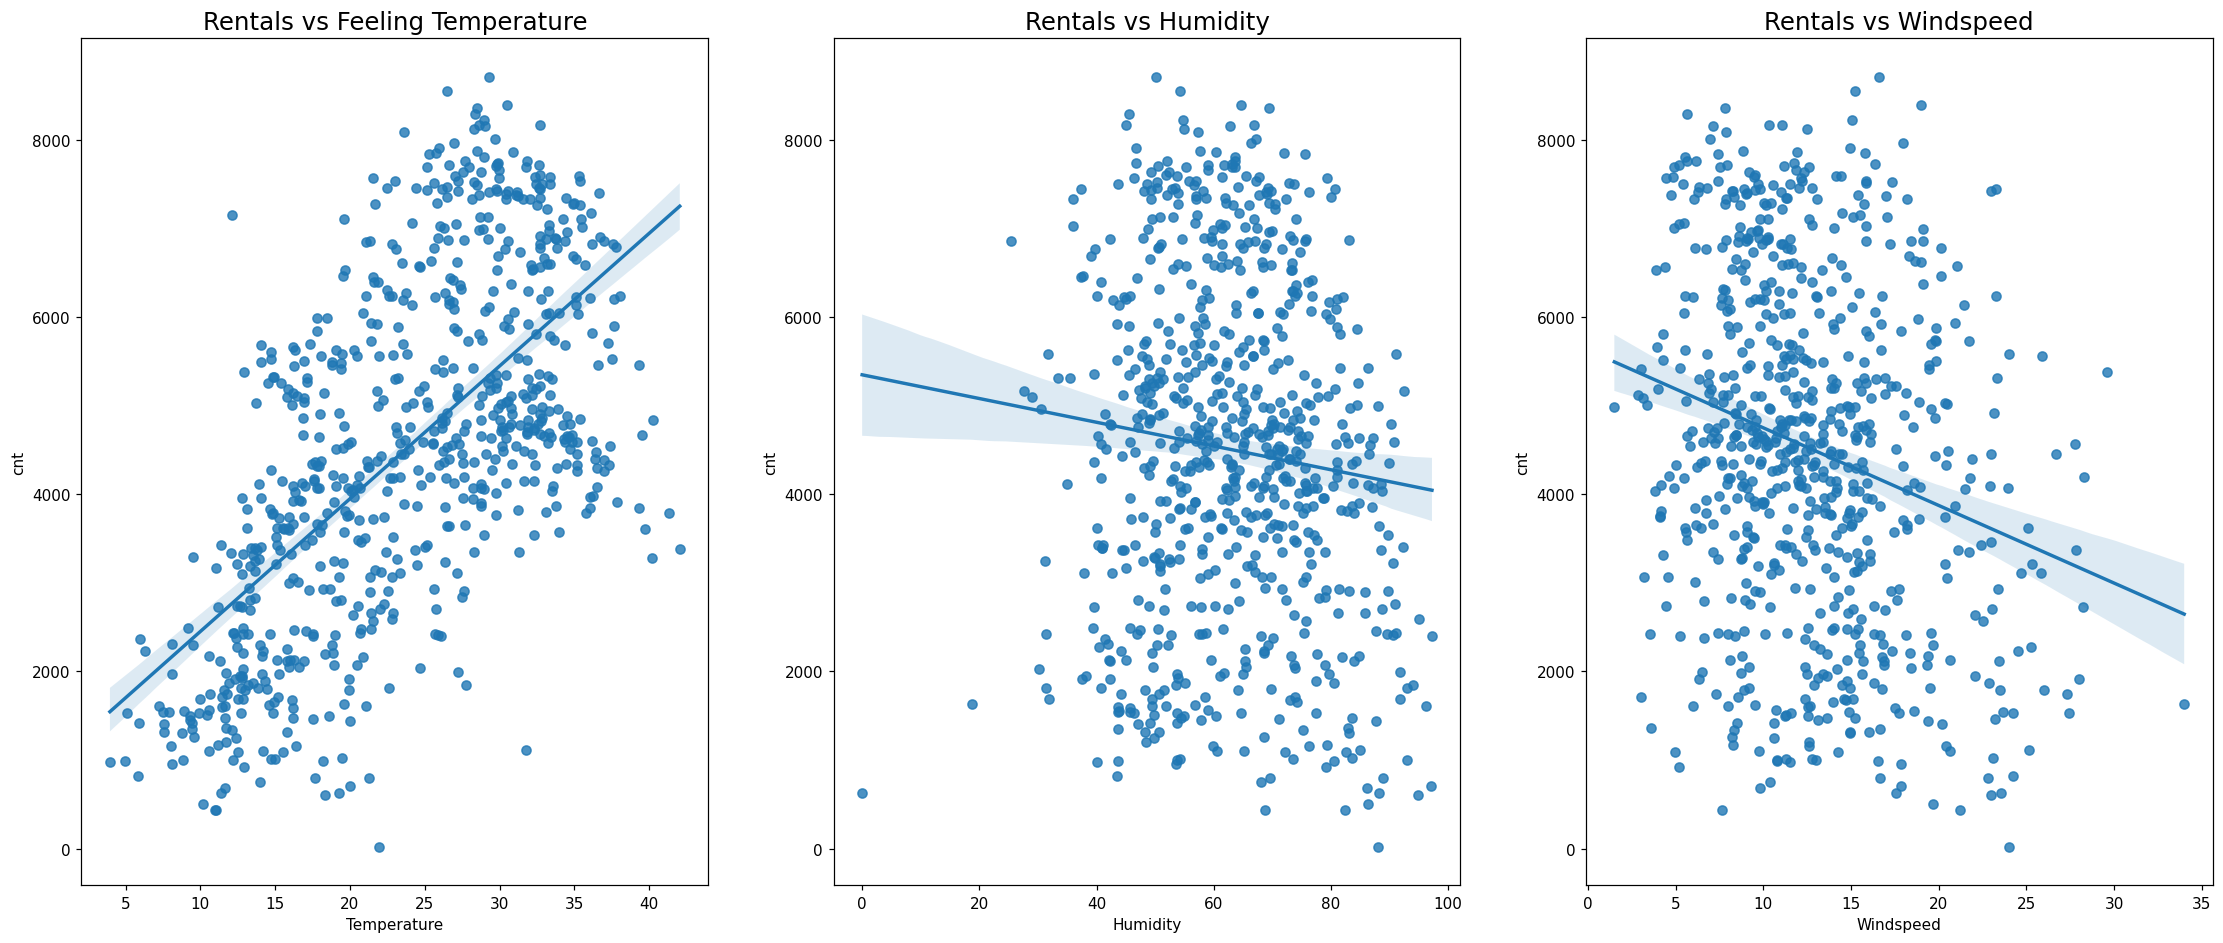

In [24]:
plt.figure(figsize=(25, 10), dpi=110)
plt.subplot(1,3,1)
plt.title('Rentals vs Feeling Temperature', fontsize=16)
sns.regplot(data=df, y='cnt', x='atemp')
plt.xlabel('Temperature')

plt.subplot(1,3,2)
plt.title('Rentals vs Humidity', fontsize=16)
sns.regplot(data=df, y='cnt', x='hum')
plt.xlabel('Humidity')

plt.subplot(1,3,3)
plt.title('Rentals vs Windspeed', fontsize=16)
sns.regplot(data=df, y='cnt', x='windspeed')
plt.xlabel('Windspeed')

plt.show()

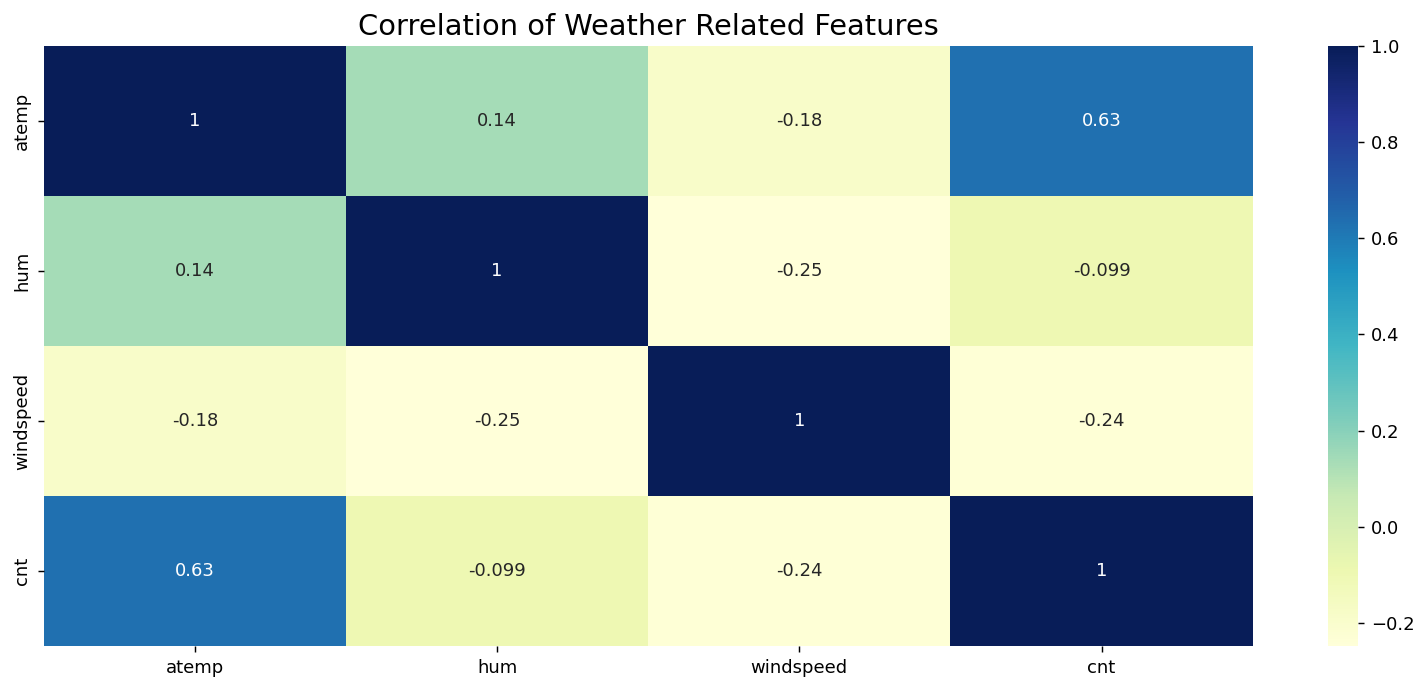

In [25]:
plt.figure(figsize=(15,6), dpi=130)
plt.title("Correlation of Weather Related Features",fontsize=16)
sns.heatmap(df[['atemp','hum','windspeed','cnt']].corr(), annot= True, cmap="YlGnBu")
plt.show()

## 5. Train-Test Split

In [26]:
# Import required libraries to carry out the data split, model building and inferencing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


#### Split Train:Test data in 70:30 ratio


In [27]:
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = np.random.seed(0))


In [28]:
# Print shape to ensure data is in expected split
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [29]:
df_train.head()

yr  holiday  workingday     atemp      hum  windspeed   cnt  weekday_mon  \
235   0        0           1  31.53460  60.5000  16.958236  5130            0   
524   1        0           0  32.41835  43.7083   9.667229  7498            0   
12    0        0           1   7.54415  47.0417  20.167000  1406            0   
161   0        0           0  33.90190  65.4583  10.374950  4966            0   
556   1        0           1  32.51355  63.3333  10.166111  7264            0   

     weekday_sat  weekday_sun  ...  mnth_jul  mnth_jun  mnth_mar  mnth_may  \
235            0            0  ...         0         0         0         0   
524            1            0  ...         0         1         0         0   
12             0            0  ...         0         0         0         0   
161            1            0  ...         0         1         0         0   
556            0            0  ...         1         0         0         0   

     mnth_nov  mnth_oct  mnth_sept  weathersit_bad  weathersit_good  \
235         0         0          0               0                1   
524         0         0          0               0                1   
12          0         0          0               0                1   
161         0         0          0               0                1   
556         0         0          0               0                1   

     weathersit_moderate  
235                    0  
524                    0  
12                     0  
161                    0  
556                    0  

[5 rows x 30 columns]

#### Feature Scaling continuous variables
Scale all features in same scale to interpret easily

Following columns are continous to be scal `d
t`e `mp,`h `um,windsp` and also dependent variable `cnt`eed



In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

yr  holiday  workingday     atemp       hum  windspeed       cnt  \
235   0        0           1  0.731037  0.488399   0.527988  0.587667   
524   1        0           0  0.755332  0.254640   0.255430  0.860101   
12    0        0           1  0.071535  0.301044   0.647940  0.159227   
161   0        0           0  0.796115  0.557424   0.281887  0.568799   
556   1        0           1  0.757949  0.527842   0.274080  0.833180   

     weekday_mon  weekday_sat  weekday_sun  ...  mnth_jul  mnth_jun  mnth_mar  \
235            0            0            0  ...         0         0         0   
524            0            1            0  ...         0         1         0   
12             0            0            0  ...         0         0         0   
161            0            1            0  ...         0         1         0   
556            0            0            0  ...         1         0         0   

     mnth_may  mnth_nov  mnth_oct  mnth_sept  weathersit_bad  weathersit_good  \
235         0         0         0          0               0                1   
524         0         0         0          0               0                1   
12          0         0         0          0               0                1   
161         0         0         0          0               0                1   
556         0         0         0          0               0                1   

     weathersit_moderate  
235                    0  
524                    0  
12                     0  
161                    0  
556                    0  

[5 rows x 30 columns]

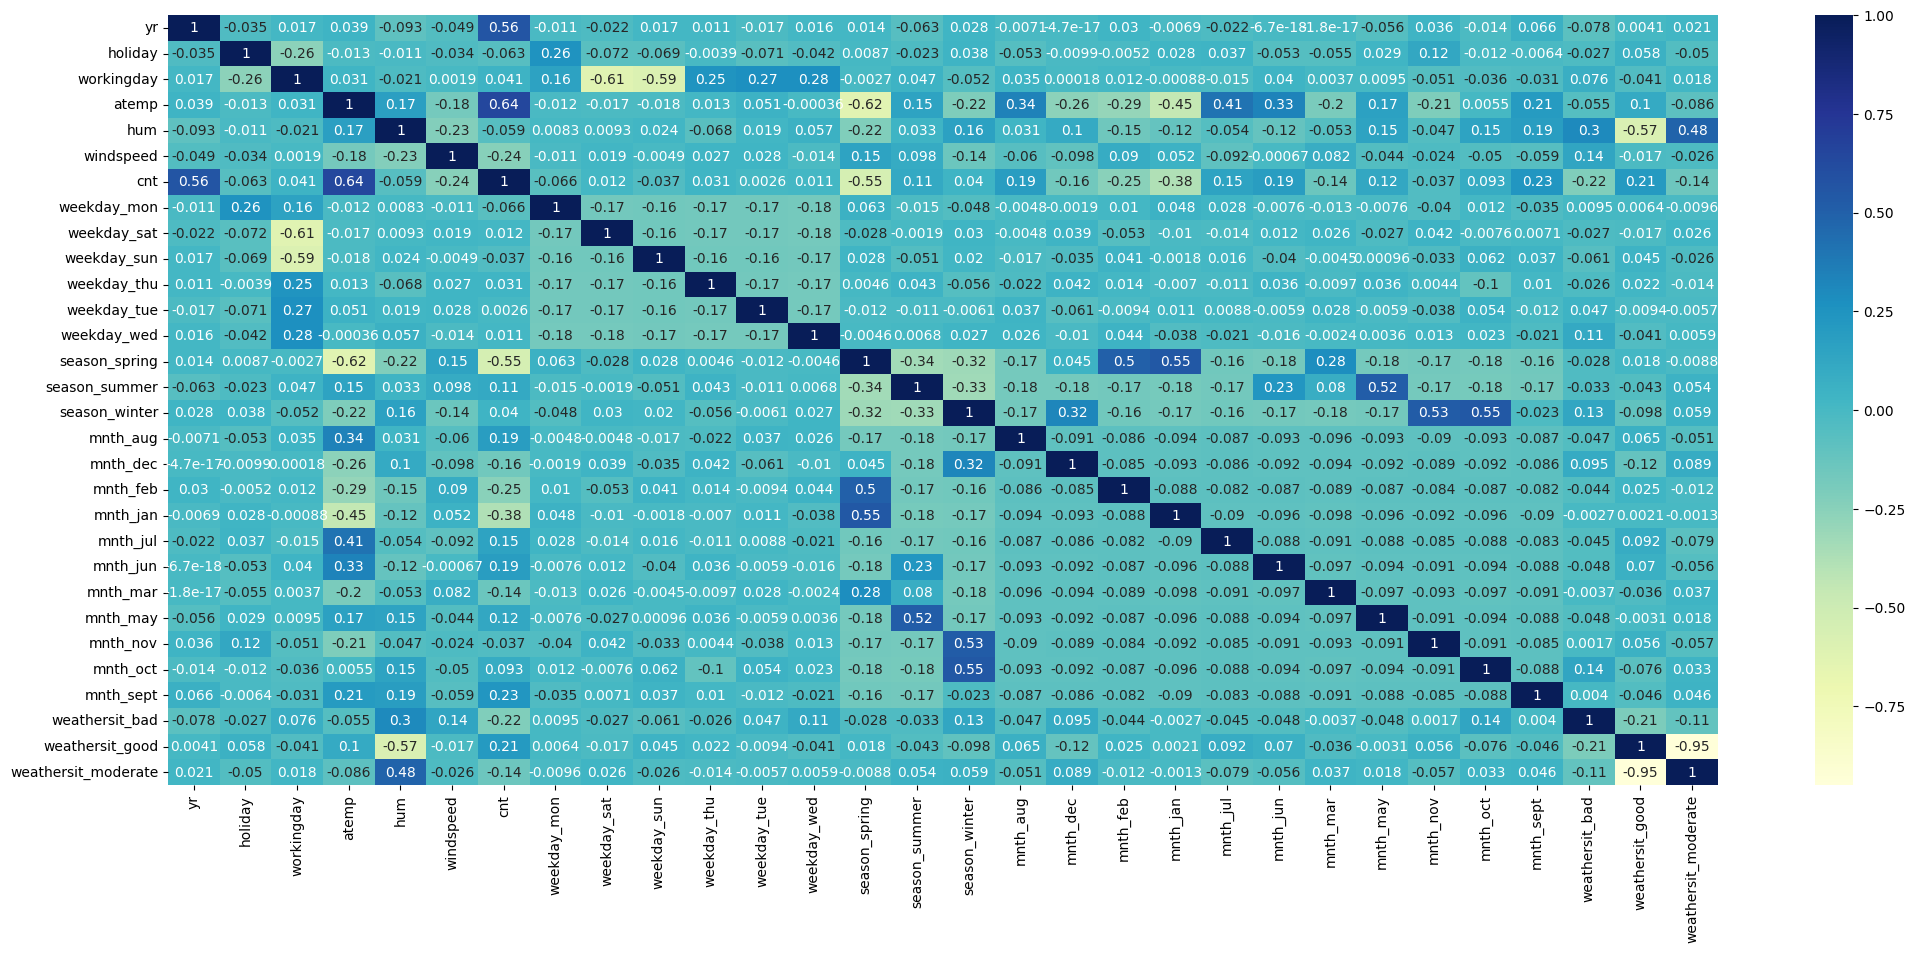

In [34]:
plt.figure(figsize=(25,10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu' )
plt.show()

#### Create X and Y datasets
Create independent and target variable datasets 

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

In [36]:
X_train.head()

yr  holiday  workingday     atemp       hum  windspeed  weekday_mon  \
235   0        0           1  0.731037  0.488399   0.527988            0   
524   1        0           0  0.755332  0.254640   0.255430            0   
12    0        0           1  0.071535  0.301044   0.647940            0   
161   0        0           0  0.796115  0.557424   0.281887            0   
556   1        0           1  0.757949  0.527842   0.274080            0   

     weekday_sat  weekday_sun  weekday_thu  ...  mnth_jul  mnth_jun  mnth_mar  \
235            0            0            0  ...         0         0         0   
524            1            0            0  ...         0         1         0   
12             0            0            1  ...         0         0         0   
161            1            0            0  ...         0         1         0   
556            0            0            0  ...         1         0         0   

     mnth_may  mnth_nov  mnth_oct  mnth_sept  weathersit_bad  weathersit_good  \
235         0         0         0          0               0                1   
524         0         0         0          0               0                1   
12          0         0         0          0               0                1   
161         0         0         0          0               0                1   
556         0         0         0          0               0                1   

     weathersit_moderate  
235                    0  
524                    0  
12                     0  
161                    0  
556                    0  

[5 rows x 29 columns]

In [37]:
y_train.head()

235    0.587667
524    0.860101
12     0.159227
161    0.568799
556    0.833180
Name: cnt, dtype: float64

In [38]:
X_train.describe()

yr     holiday  workingday       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.500000    0.029412    0.690196    0.510792    0.514523    0.373755   
std      0.500491    0.169124    0.462867    0.227658    0.194619    0.192867   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.311891    0.361513    0.232054   
50%      0.500000    0.000000    1.000000    0.514074    0.513631    0.353541   
75%      1.000000    0.000000    1.000000    0.704145    0.651342    0.483991   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weekday_mon  weekday_sat  weekday_sun  weekday_thu  ...    mnth_jul  \
count   510.000000   510.000000   510.000000   510.000000  ...  510.000000   
mean      0.145098     0.145098     0.135294     0.141176  ...    0.076471   
std       0.352545     0.352545     0.342373     0.348545  ...    0.266010   
min       0.000000     0.000000     0.000000     0.000000  ...    0.000000   
25%       0.000000     0.000000     0.000000     0.000000  ...    0.000000   
50%       0.000000     0.000000     0.000000     0.000000  ...    0.000000   
75%       0.000000     0.000000     0.000000     0.000000  ...    0.000000   
max       1.000000     1.000000     1.000000     1.000000  ...    1.000000   

         mnth_jun    mnth_mar    mnth_may    mnth_nov    mnth_oct   mnth_sept  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.090196    0.086275    0.080392    0.086275    0.076471   
std      0.281045    0.286744    0.281045    0.272166    0.281045    0.266010   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit_bad  weathersit_good  weathersit_moderate  
count      510.000000       510.000000           510.000000  
mean         0.023529         0.641176             0.335294  
std          0.151726         0.480126             0.472557  
min          0.000000         0.000000             0.000000  
25%          0.000000         0.000000             0.000000  
50%          0.000000         1.000000             0.000000  
75%          0.000000         1.000000             1.000000  
max          1.000000         1.000000             1.000000  

[8 rows x 29 columns]

#### Use RFE and Automated approach to build a Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

##### Reduce features down to 18 with automated approach using RFE


In [41]:
rfe = RFE(lr,n_features_to_select=18)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=18)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 10),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_mar', False, 6),
 ('mnth_may', False, 12),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 8),
 ('mnth_sept', True, 1),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [43]:
X_train.columns[rfe.support_]


Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'weekday_sat',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_nov', 'mnth_sept', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]


Index(['holiday', 'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'season_summer', 'mnth_aug', 'mnth_mar', 'mnth_may',
       'mnth_oct'],
      dtype='object')

In [45]:
X_train[X_train.columns[rfe.support_]].shape

(510, 18)

In [46]:
X_train[X_train.columns[rfe.support_]].head()

yr  workingday     atemp       hum  windspeed  weekday_sat  \
235   0           1  0.731037  0.488399   0.527988            0   
524   1           0  0.755332  0.254640   0.255430            1   
12    0           1  0.071535  0.301044   0.647940            0   
161   0           0  0.796115  0.557424   0.281887            1   
556   1           1  0.757949  0.527842   0.274080            0   

     season_spring  season_winter  mnth_dec  mnth_feb  mnth_jan  mnth_jul  \
235              0              0         0         0         0         0   
524              0              0         0         0         0         0   
12               1              0         0         0         1         0   
161              0              0         0         0         0         0   
556              0              0         0         0         0         1   

     mnth_jun  mnth_nov  mnth_sept  weathersit_bad  weathersit_good  \
235         0         0          0               0                1   
524         1         0          0               0                1   
12          0         0          0               0                1   
161         1         0          0               0                1   
556         0         0          0               0                1   

     weathersit_moderate  
235                    0  
524                    0  
12                     0  
161                    0  
556                    0

## 6. Build Model

#### Create reusable functions

In [47]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lrm = sm.OLS(y_train, X_train_sm).fit()
    print(lrm.summary())
    return lrm

In [48]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def calculate_vif(cols):
    vif_df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = vif_df.columns
    vif['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [49]:
#Function to plot heatmap
def plot_heatmap(cols):
    plt.figure(figsize = (15,10))
    sns.heatmap(X_train[cols].corr(), cmap='GnBu', annot=True)
    plt.show()

#### Model 1 
Start with all variables selected by RFE.

**Assessment**: 
R2: Good R2 of 83.1%
mnth_jun: Has high P value
weathersit_good and weathersit_moderate: Have high VIF
Most independent variables have negative coefficients

**Action**:
Remove mnth_jun and create a new model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.44e-177
Time:                        22:29:41   Log-Likelihood:                 509.61
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     492   BIC:                            -907.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1784    

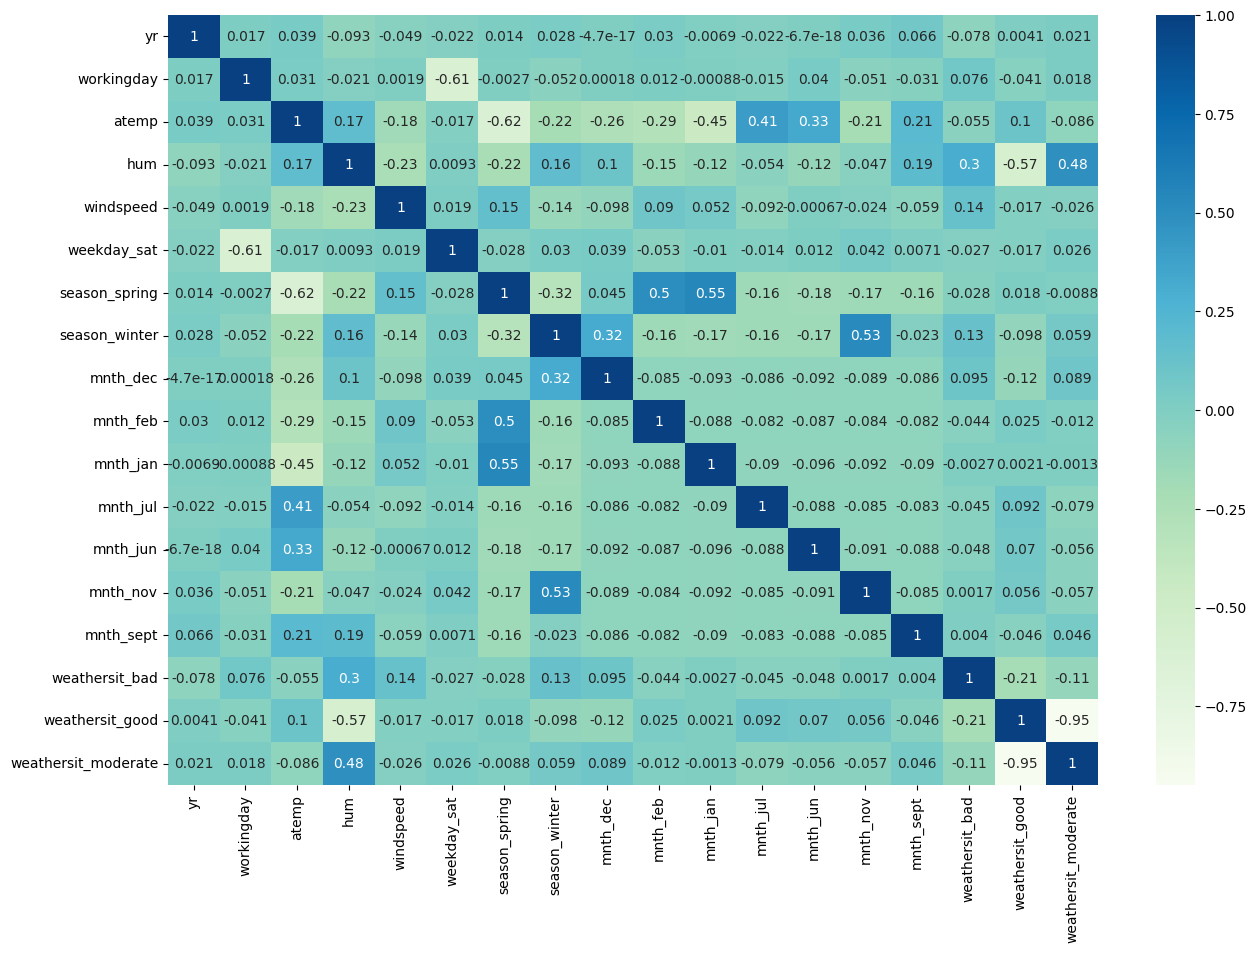

In [50]:
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'weekday_sat',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_nov', 'mnth_sept', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate']
build_model(cols)
calculate_vif(cols)
plot_heatmap(cols)

#### Model 2
Remove mnth_jun from the independent variables

**Assessment**: 
R2: Good R2 of 83.1%
No independent variables have high P Value
weathersit_good and weathersit_moderate: Have high VIF
Most independent variables have negative coefficients

**Action**:
Remove weathersit_good and weathersit_moderate and create a new model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     150.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.76e-178
Time:                        22:29:42   Log-Likelihood:                 508.38
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     493   BIC:                            -910.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1788    

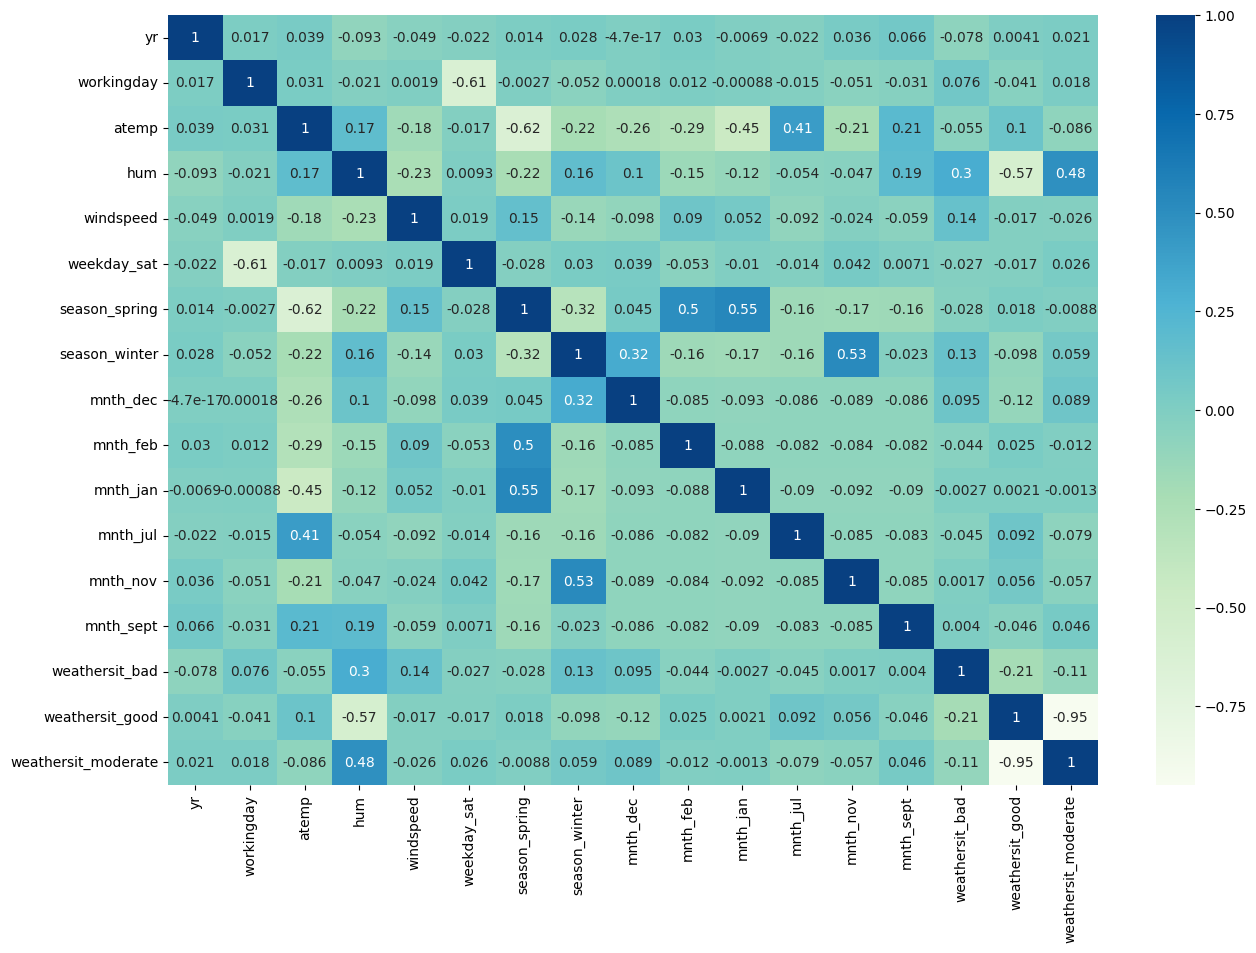

In [51]:
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'weekday_sat',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate']
build_model(cols)
calculate_vif(cols)
plot_heatmap(cols)

#### Model 3
Remove weathersit_good and weathersit_moderate from independent variables

**Assessment**: 
R2: Good R2 of 82.4%
No independent variables have high P Value
atemp: Have high VIF
Most independent variables have negative coefficients

**Action**:
Remove atemp and create a new model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.43e-175
Time:                        22:29:43   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -967.1
Df Residuals:                     494   BIC:                            -899.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3357      0.030     11.

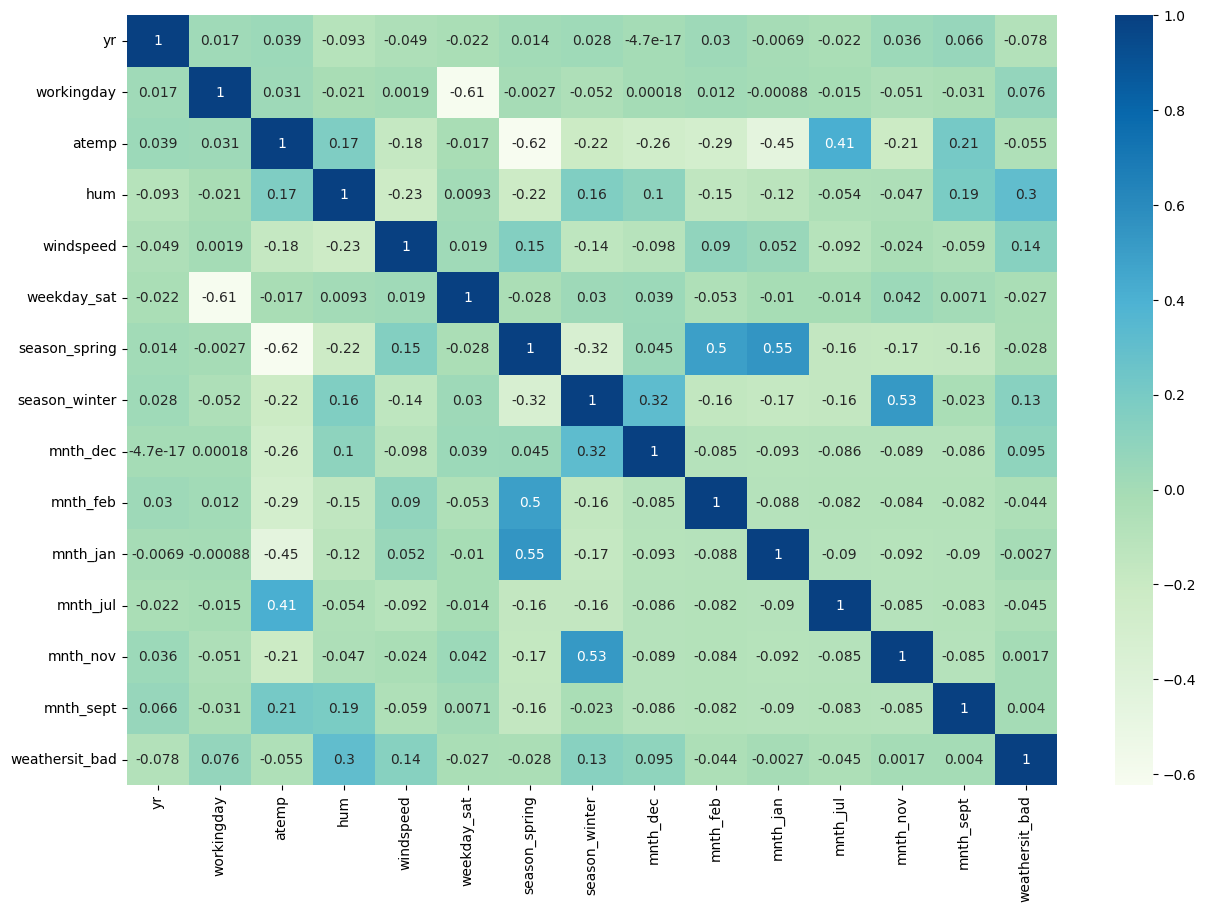

In [52]:
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'weekday_sat',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad']
build_model(cols)
calculate_vif(cols)
plot_heatmap(cols)

#### Model 4
Remove atemp from independent variables

**Assessment**: 
- R2: R2 dropped to 76.2%
- season_winter: has high P Value
- hum : Have high VIF
- Most independent variables have negative coefficients

**Action**:
Remove season_winter and create a new model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     113.2
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.73e-144
Time:                        22:29:43   Log-Likelihood:                 421.89
No. Observations:                 510   AIC:                            -813.8
Df Residuals:                     495   BIC:                            -750.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6128      0.025     24.

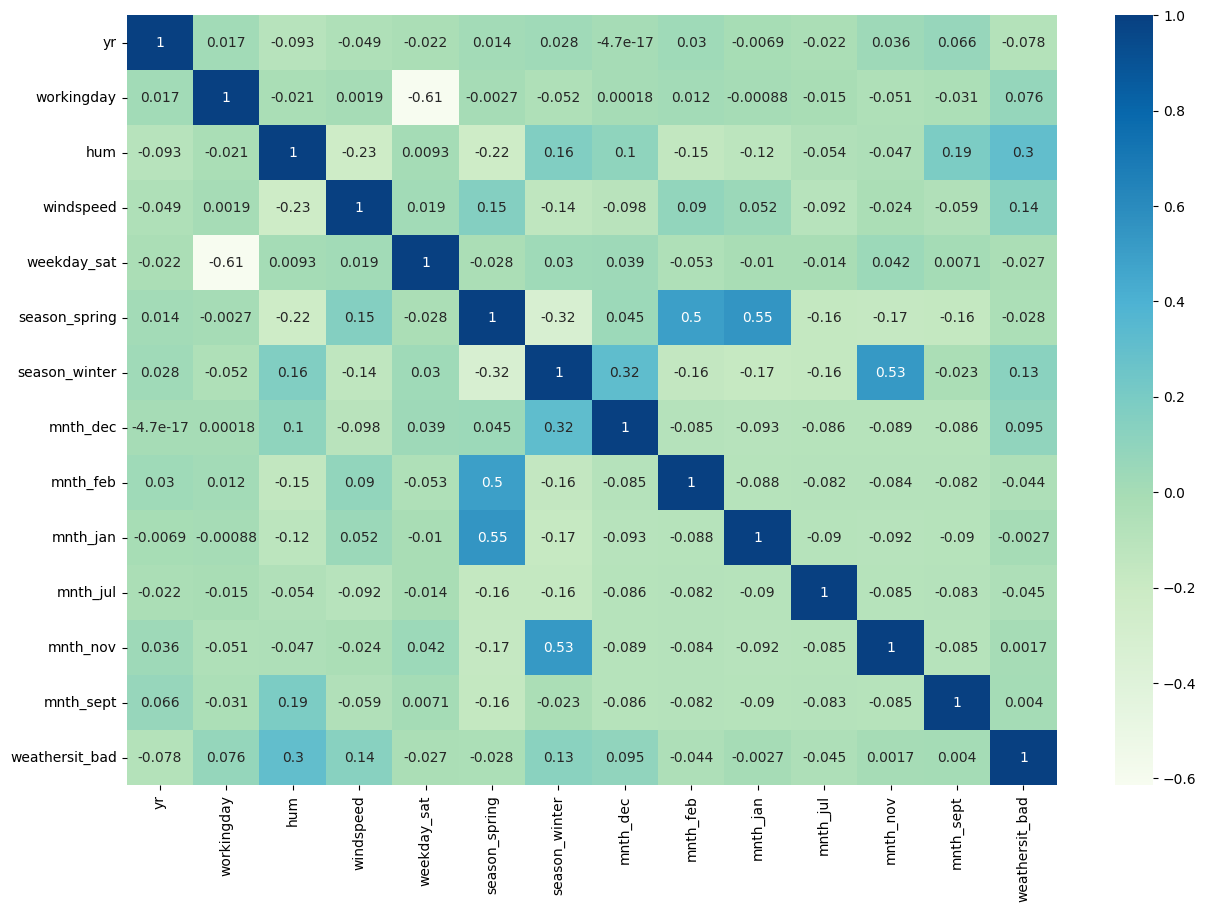

In [53]:
cols = ['yr', 'workingday', 'hum', 'windspeed', 'weekday_sat',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad']
build_model(cols)
calculate_vif(cols)
plot_heatmap(cols)

#### Model 5
Remove season_winter from independent variables

**Assessment**: 
- R2: R2 stable at 76.2%
- mnth_jul: has high P Value
- No independent variables have high VIF
- Most independent variables have negative coefficients

**Action**:
Remove mnth_jul and create a new model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     122.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.93e-145
Time:                        22:29:44   Log-Likelihood:                 421.71
No. Observations:                 510   AIC:                            -815.4
Df Residuals:                     496   BIC:                            -756.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6149      0.025     24.

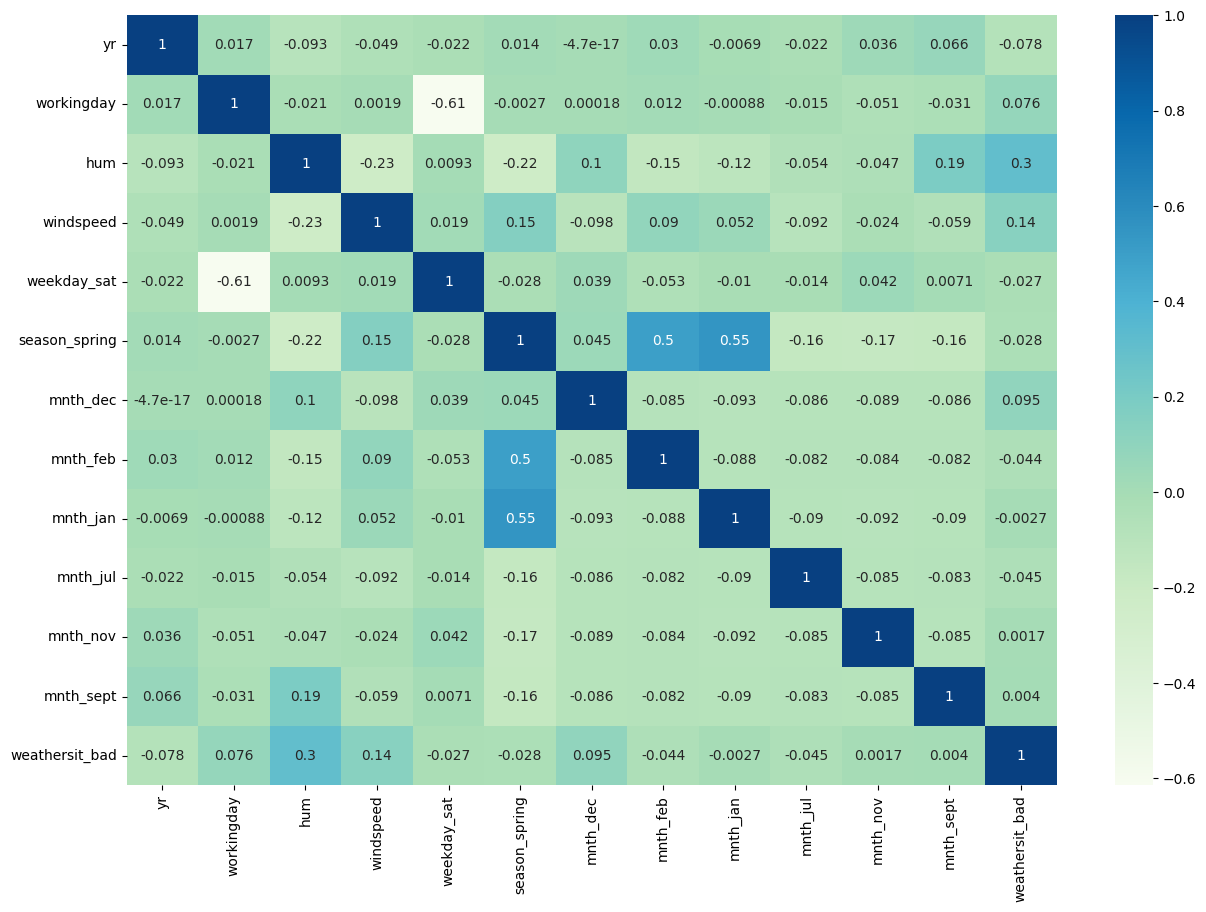

In [54]:
cols = ['yr', 'workingday', 'hum', 'windspeed', 'weekday_sat',
       'season_spring', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad']
build_model(cols)
calculate_vif(cols)
plot_heatmap(cols)

#### Model 6
Remove mnth_jul from independent variables

**Assessment**: 
R2: R2 stable at 76.1%
No independent variables high P Value
No independent variables have high VIF
Most independent variables have negative coefficients

**Action**:
Try with other columms and create a new model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     132.1
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          5.20e-146
Time:                        22:29:45   Log-Likelihood:                 421.25
No. Observations:                 510   AIC:                            -816.5
Df Residuals:                     497   BIC:                            -761.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6202      0.024     25.

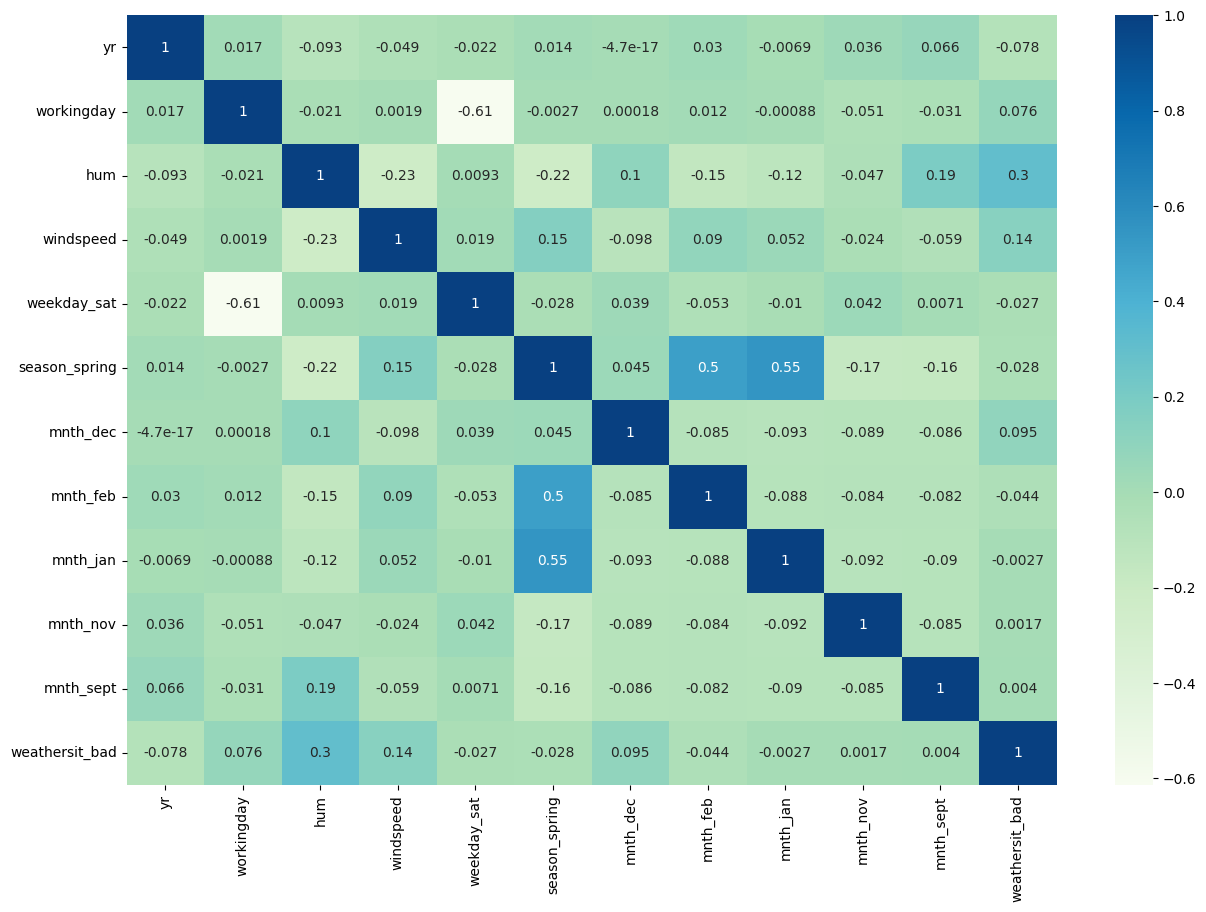

In [55]:
cols = ['yr', 'workingday', 'hum', 'windspeed', 'weekday_sat',
       'season_spring', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_nov', 'mnth_sept', 'weathersit_bad']
build_model(cols)
calculate_vif(cols)
plot_heatmap(cols)

#### Model 7
Reintroduce weathersit_moderate and atemp

**Assessment**: 
R2: R2 stable at 81.3%
No independent variables high P Value
No independent variables have high VIF
Most independent variables have negative coefficients

**Action**:
Keep this model

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     216.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.98e-174
Time:                        22:29:45   Log-Likelihood:                 483.22
No. Observations:                 510   AIC:                            -944.4
Df Residuals:                     499   BIC:                            -897.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2561    

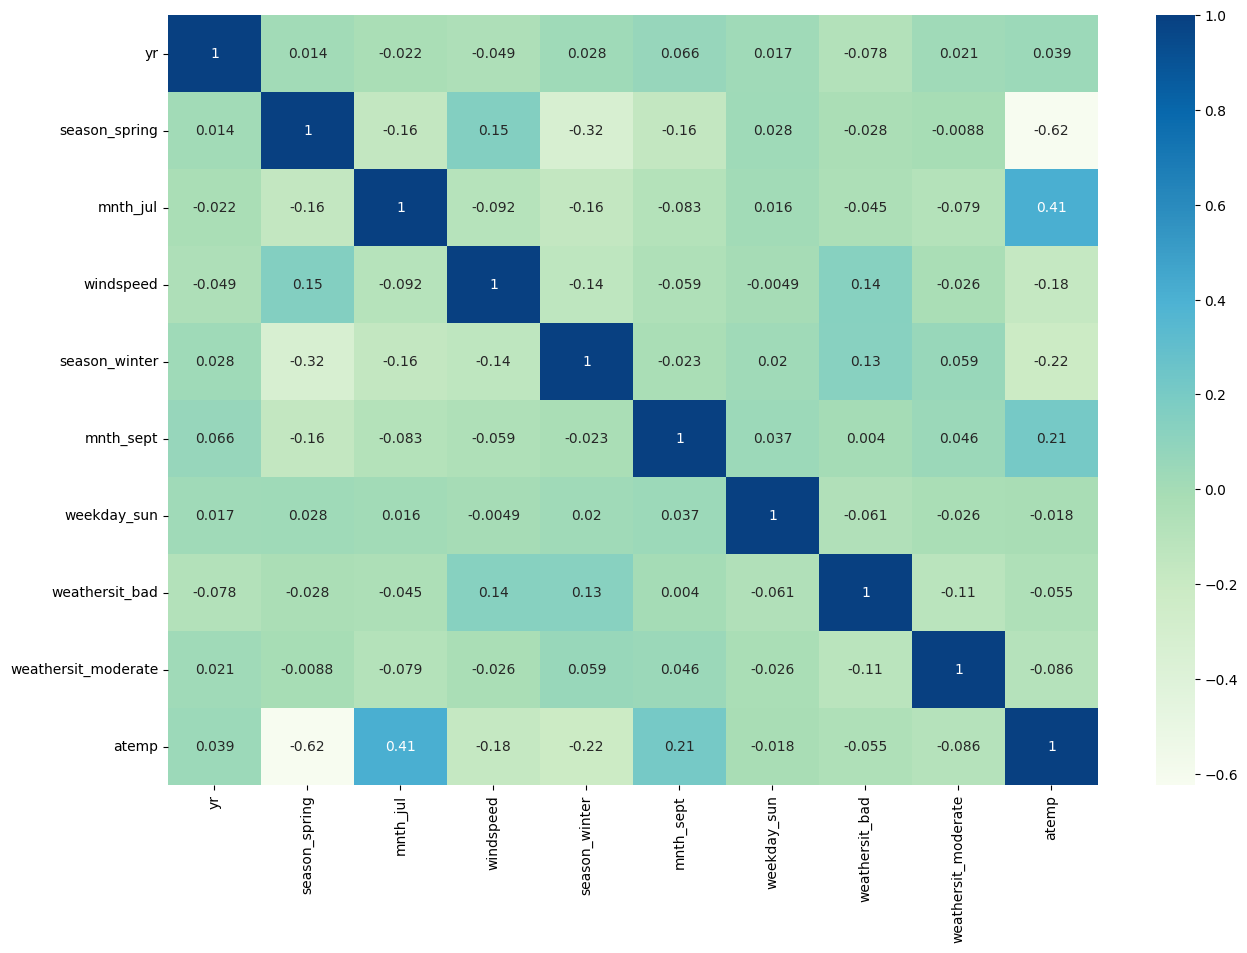

In [56]:
final_cols = ['yr', 'season_spring', 'mnth_jul', 'windspeed', 
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'atemp']
build_model(final_cols)
calculate_vif(final_cols)
plot_heatmap(final_cols)

### Residual Analysis

##### 1. Create Y_Train_Pred values from the model 

In [57]:
X_train_sm = sm.add_constant(X_train[final_cols])
lrm = sm.OLS(y_train, X_train_sm).fit()
y_train_pred = lrm.predict(X_train_sm)

##### 2. Plot Residuals Histogram 
**Observation**: The Residuals are Normally Distributed

Text(0.5, 0, 'Errors')

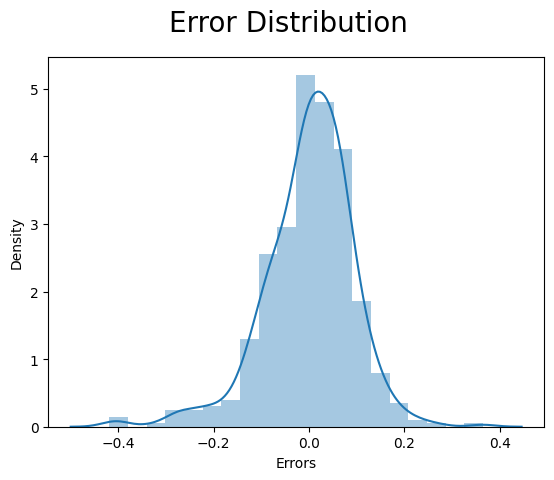

In [58]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)   

##### 3. Plot Actual vs Predicted 
**Observation**: The Predicted pretty much track the Actuals 

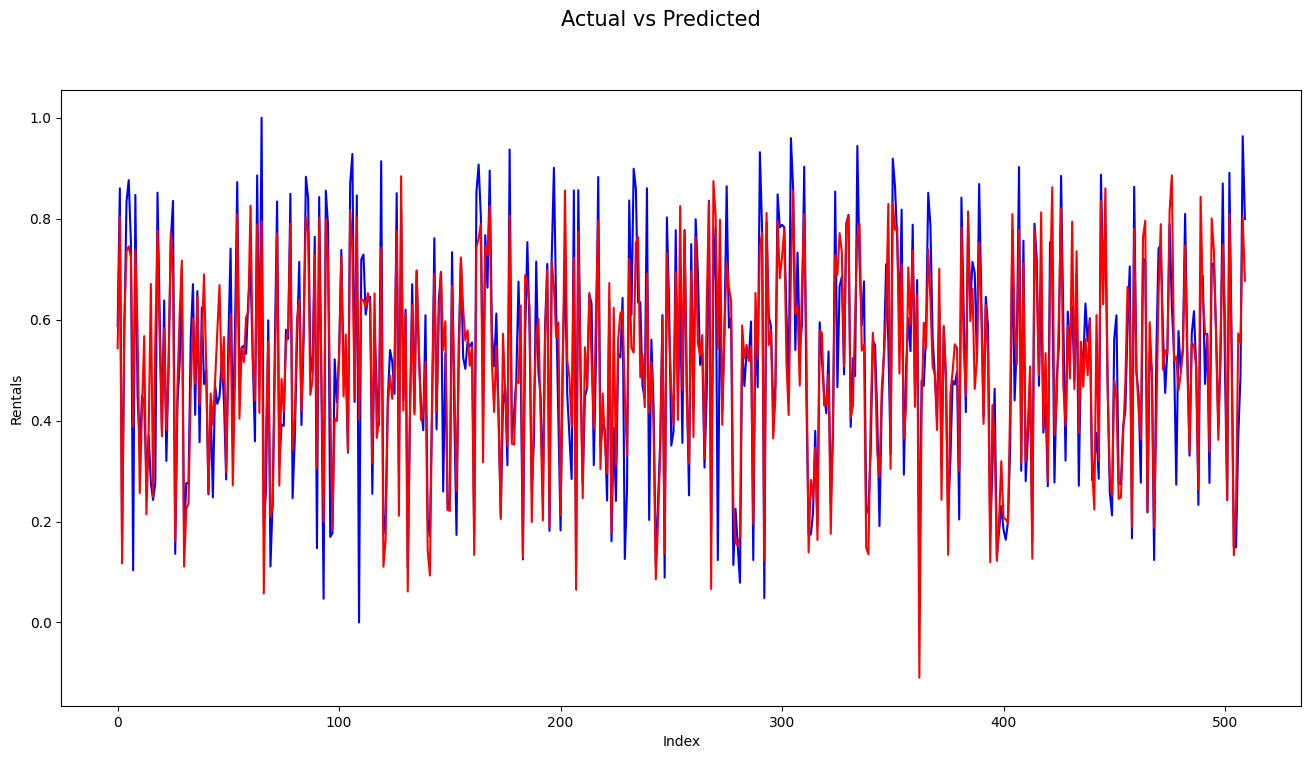

In [59]:
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize = (16, 8))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Rentals')
plt.show()

##### 4. Check R2 of Predicated Values


In [60]:
r2_score(y_train,y_train_pred)


0.8128201661694388

##### 5. Check Linearity between Training Data and Residual

**Observation**: The residuals are linear with no patterns detected 

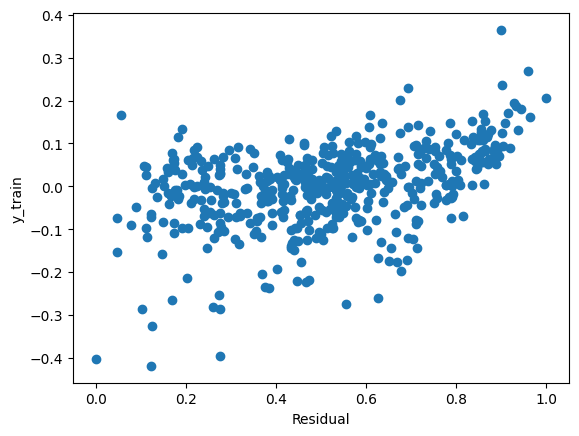

In [61]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## 7. Model Evaluation

##### Scale the test dataset using only Transform

In [62]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

##### Prepare the X_test and y_test datasets

In [63]:
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
print(y_test.shape)
print(X_test.shape)

(219,)
(219, 29)


##### Predict the values for test data

In [65]:
X_train_sm = sm.add_constant(X_test[final_cols])
y_test_pred = lrm.predict(X_train_sm)

##### Check the R2 Score of Test Predicted Data
**Observation**: The Test Prediction R2 score is very close to Train Prediction. Hence the model holds well

In [66]:
r2_score(y_test,y_test_pred)


0.8451325513291874

Text(0, 0.5, 'y_test_pred')

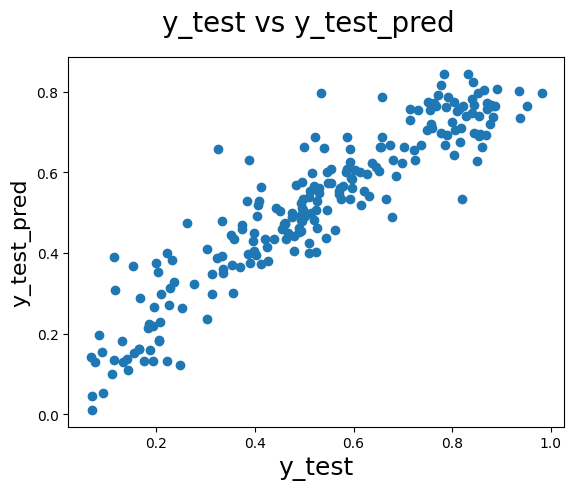

In [67]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

##### Plot Actual vs Predicted 
**Observation**: The Predicted pretty much track the Actuals 

Text(0, 0.5, 'Counts')

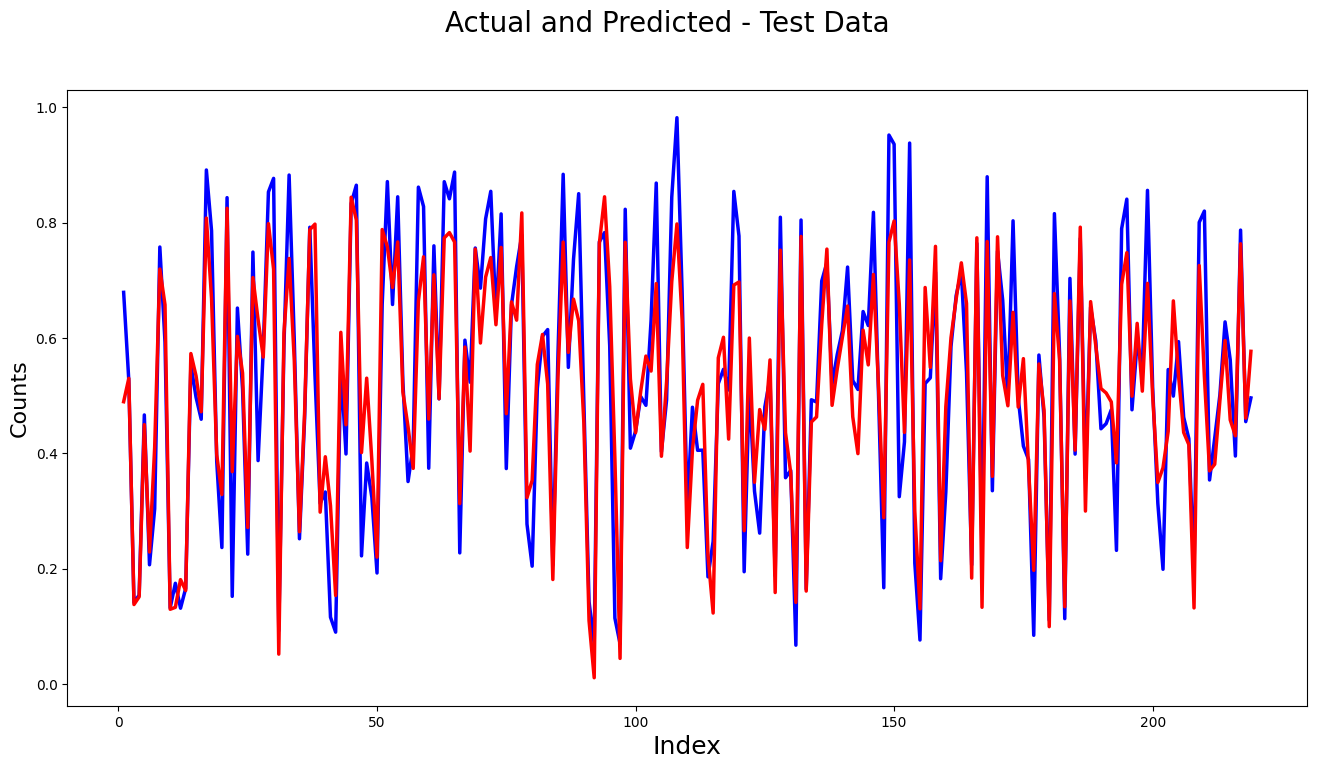

In [68]:
 c = [i for i in range(1,len(y_test)+1,1)]
plt.figure(figsize = (16, 8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
plt.suptitle('Actual and Predicted - Test Data', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)                               # Y-label

##### Plot Residuals Histogram 
**Observation**: The Residuals are Normally Distributed

Text(0.5, 0, 'Errors')

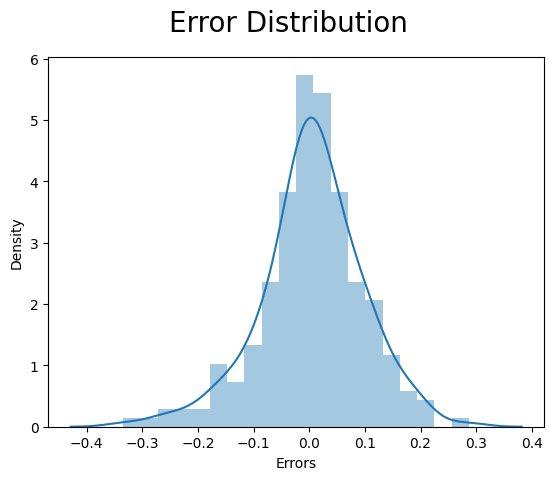

In [69]:
residual = y_test-y_test_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)   

##### Check Linearity between Test Dat and Residual

**Observation**: The residuals are linear with no patterns detected 

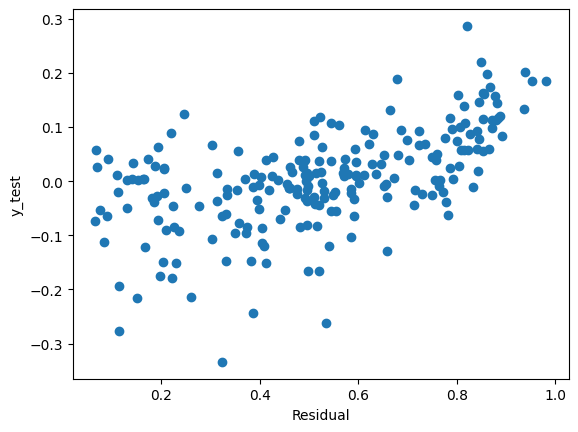

In [70]:
plt.scatter(y_test,residual)
plt.ylabel("y_test")
plt.xlabel("Residual")
plt.show()

## 8. Interpretation
Key variables that influence the rental demand are as follows:
- holiday - Positive Coorelation
- atemp (Feeling Temperature) - Positive Correlation
- hum - Negative Correlation
- windspeed - Negative Correlation
- Season - Spring and Fall
- months - Sept - good, Jan, Feb, Nov, Dec - Not so good
- Year (2019)
- weathersit - Avoid Bad Weather

BoomBikes can take measures to attact rentals as follows:
- Company should focus on expanding business during September and during Spring and Fall when weather is pleasant
- Expect reduced bookings during Light Snow or Rain.
